<a href="https://colab.research.google.com/github/saja-aish12/MachineLearningProject/blob/master/machine_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1540]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import sklearn.linear_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
# %matplotlib notebook


In [1541]:
data = pd.read_csv('WB.csv')

In [1542]:
data.head()

,FID,OBJECTID,NAMEAR,NAMEEN,CORONA__Ca,Population,PopDensity,AgingRatio,ServicesHi,HealthServ,Landuse,Commercial,RoadDensit,GreenAreas,Open_spave
0,0,12,??????,Hebron (Al Khalil),7299,15988,5.92,0.02000,5,100,2.7861,0.001750,0.04670,0.080100,0.8651
1,1,15,??? ?????,Deir Istiya,139,3930,4.20,0.04700,1,8,2.3300,0.004900,0.16400,0.000000,0.8800
2,2,21,????,Battir,63,4966,3.00,0.05000,1,12,2.8200,0.000000,0.03200,0.000000,0.9100
3,3,23,?????,Surif,181,18534,3.70,0.02579,1,30,2.6985,0.002074,0.10506,0.002709,0.9201
4,4,24,??? ???,Beit Ummar,418,18202,2.00,0.03300,2,34,2.3700,0.003000,0.07800,0.162000,0.8940


In [1543]:
data.count

<bound method DataFrame.count of      FID  OBJECTID        NAMEAR  ... RoadDensit  GreenAreas  Open_spave
0      0        12        ??????  ...    0.04670    0.080100      0.8651
1      1        15     ??? ?????  ...    0.16400    0.000000      0.8800
2      2        21          ????  ...    0.03200    0.000000      0.9100
3      3        23         ?????  ...    0.10506    0.002709      0.9201
4      4        24       ??? ???  ...    0.07800    0.162000      0.8940
..   ...       ...           ...  ...        ...         ...         ...
186  186       578  ??? ??? ????  ...    0.00000    0.000000      0.8300
187  187       579      ??? ????  ...    0.09500    0.000000      0.8300
188  188       580        ??????  ...    0.13600    0.001200      0.9600
189  189       581       ??? ???  ...    0.18000    0.020000      0.9000
190  190       584      ??? ????  ...    0.48000    0.000000      0.7100

[191 rows x 15 columns]>

In [1544]:
from sklearn.preprocessing import StandardScaler
X = data[['Population','PopDensity','AgingRatio','ServicesHi','HealthServ','Landuse','Commercial','RoadDensit','GreenAreas','Open_spave']]
y = data['CORONA__Ca']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10) 

#x = pd.DataFrame(x)

In [1545]:
x=data[['FID','OBJECTID','Population','PopDensity','AgingRatio','ServicesHi','HealthServ','Landuse','Commercial','RoadDensit','GreenAreas','Open_spave','CORONA__Ca']]

x.corr()

,FID,OBJECTID,Population,PopDensity,AgingRatio,ServicesHi,HealthServ,Landuse,Commercial,RoadDensit,GreenAreas,Open_spave,CORONA__Ca
FID,1.000000,0.992761,-0.089409,0.071611,0.169325,-0.077921,-0.044192,-0.020391,0.187306,0.069416,0.093280,-0.050057,-0.049515
OBJECTID,0.992761,1.000000,-0.090901,0.076189,0.174289,-0.080119,-0.041009,-0.010986,0.188723,0.069567,0.085181,-0.043358,-0.058696
Population,-0.089409,-0.090901,1.000000,-0.023690,-0.062759,0.463569,0.535200,-0.009145,0.062794,0.082177,0.042760,0.024566,0.449980
PopDensity,0.071611,0.076189,-0.023690,1.000000,-0.007668,-0.031345,-0.035081,-0.219817,0.116781,-0.011663,0.589041,0.013193,-0.019244
AgingRatio,0.169325,0.174289,-0.062759,-0.007668,1.000000,0.076334,0.027195,0.029910,0.044677,0.068859,-0.028005,0.002115,-0.023188
ServicesHi,-0.077921,-0.080119,0.463569,-0.031345,0.076334,1.000000,0.661418,-0.019779,0.176109,0.201133,0.097227,0.061326,0.570953
HealthServ,-0.044192,-0.041009,0.535200,-0.035081,0.027195,0.661418,1.000000,-0.030717,0.107054,0.146903,0.144828,0.043087,0.653498
Landuse,-0.020391,-0.010986,-0.009145,-0.219817,0.029910,-0.019779,-0.030717,1.000000,0.055832,-0.093620,-0.237293,-0.066678,-0.045853
Commercial,0.187306,0.188723,0.062794,0.116781,0.044677,0.176109,0.107054,0.055832,1.000000,0.085292,0.204595,-0.033578,0.090260
RoadDensit,0.069416,0.069567,0.082177,-0.011663,0.068859,0.201133,0.146903,-0.093620,0.085292,1.000000,0.047780,-0.010977,0.112087


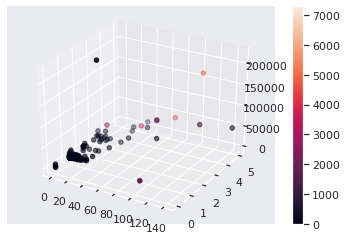

In [1546]:
ax = plt.axes(projection='3d')
scatter_plot2 = ax.scatter3D(data['HealthServ'],data['ServicesHi'],data['Population'],c=data['CORONA__Ca'])
plt.colorbar(scatter_plot2)
plt.show()

In [1547]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(X_train)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

principalComponents = pd.DataFrame(principalComponents)#
principalComponents.head()


,0,1,2
0,-5705.137255,-43.094877,0.472017
1,9176.808543,-7.667394,-20.917780
2,3217.850324,-25.194410,-2.355285
3,6494.851957,-18.606996,0.934261
4,-1826.151183,-30.615117,-1.102480


In [1548]:
finalDf = pd.concat([principalDf,y_train], axis = 1)
finalDf = pd.DataFrame(finalDf)#
finalDf.head()#

,principal component 1,principal component 2,principal component 3,CORONA__Ca
0,-5705.137255,-43.094877,0.472017,7299.0
1,9176.808543,-7.667394,-20.917780,NaN
2,3217.850324,-25.194410,-2.355285,NaN
3,6494.851957,-18.606996,0.934261,181.0
4,-1826.151183,-30.615117,-1.102480,418.0


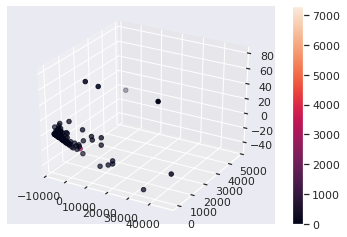

In [1549]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = finalDf['principal component 1']
ydata = finalDf['principal component 2']
zdata = finalDf['principal component 3']
#ax.scatter3D(xdata, ydata, zdata)
scatter_plot = ax.scatter3D(xdata, ydata, zdata,c=finalDf['CORONA__Ca'])
plt.colorbar(scatter_plot)
plt.show()


In [1550]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [1551]:
clf.predict(X_test)

array([ 3.25881952e+00,  6.04062654e+02, -5.48385281e+01,  6.14527988e+02,
       -2.61441133e+01, -3.14207501e+01,  3.53186681e+02,  6.01482047e+01,
        1.16911793e+02, -2.68119230e+01, -6.53224478e+01,  4.49508285e+00,
        2.73526366e+01, -5.92733873e+01, -8.08809391e+01, -3.54873521e+01,
        9.61804829e+02,  3.23819930e+01, -2.25550012e+02,  1.02329340e+03,
       -1.03356654e+02, -4.46115440e+01,  1.20101280e+02,  4.54114716e+01,
        2.52878144e+03,  4.10994285e+01, -4.65682325e+01,  4.09004271e+02,
        2.32109053e+02, -6.79856694e-01,  1.60097330e+02, -1.22575165e+01,
        1.42526499e+02, -1.53596917e+02,  8.31921917e+01,  2.70737609e+03,
        4.31411402e+02,  2.85362052e+01,  9.01869969e+02])

In [1552]:
clf.score(X_test, y_test)

0.584225626010759

In [1553]:
import numpy

corr_matrix = numpy.corrcoef(y_test, clf.predict(X_test))
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

0.6053383738551084


In [1554]:
#####################################PART_2###########################################################

In [1555]:
#missing__NAN
data.dropna(inplace = True)
data.head()

,FID,OBJECTID,NAMEAR,NAMEEN,CORONA__Ca,Population,PopDensity,AgingRatio,ServicesHi,HealthServ,Landuse,Commercial,RoadDensit,GreenAreas,Open_spave
0,0,12,??????,Hebron (Al Khalil),7299,15988,5.92,0.02000,5,100,2.7861,0.001750,0.04670,0.080100,0.8651
1,1,15,??? ?????,Deir Istiya,139,3930,4.20,0.04700,1,8,2.3300,0.004900,0.16400,0.000000,0.8800
2,2,21,????,Battir,63,4966,3.00,0.05000,1,12,2.8200,0.000000,0.03200,0.000000,0.9100
3,3,23,?????,Surif,181,18534,3.70,0.02579,1,30,2.6985,0.002074,0.10506,0.002709,0.9201
4,4,24,??? ???,Beit Ummar,418,18202,2.00,0.03300,2,34,2.3700,0.003000,0.07800,0.162000,0.8940


In [1556]:
#clean
(data[['Population','PopDensity','AgingRatio'
#,'ServicesHi','HealthServ','Landuse','Commercial','RoadDensit','GreenAreas','Open_spave'
]]==0).sum()

Population    0
PopDensity    2
AgingRatio    1
dtype: int64

In [1557]:
(((data['HealthServ']%2)==1) ).sum()

0

In [1558]:
((data['ServicesHi']<1) | (data['ServicesHi']>5)).sum()

5

In [1559]:
#delete ServicesHi rows
index_names = data[ (data['ServicesHi']<1) | (data['ServicesHi']>5)].FID
data.drop(index_names, inplace = True)

In [1560]:
#redundant data
x=data[['FID','OBJECTID','Population','PopDensity','AgingRatio','ServicesHi','HealthServ','Landuse','Commercial','RoadDensit','GreenAreas','Open_spave','CORONA__Ca']]

x.corr()

,FID,OBJECTID,Population,PopDensity,AgingRatio,ServicesHi,HealthServ,Landuse,Commercial,RoadDensit,GreenAreas,Open_spave,CORONA__Ca
FID,1.000000,0.992761,-0.092566,0.073064,0.170015,-0.071347,-0.076995,-0.016601,0.179761,0.071330,0.089189,-0.050600,-0.062446
OBJECTID,0.992761,1.000000,-0.093950,0.077599,0.174545,-0.075092,-0.072926,-0.007067,0.181961,0.071457,0.081446,-0.043991,-0.071557
Population,-0.092566,-0.093950,1.000000,-0.023834,-0.064610,0.474681,0.552250,-0.006783,0.060376,0.085544,0.037740,0.019107,0.448557
PopDensity,0.073064,0.077599,-0.023834,1.000000,-0.008422,-0.035080,-0.035984,-0.220591,0.117491,-0.011308,0.593895,0.013110,-0.018953
AgingRatio,0.170015,0.174545,-0.064610,-0.008422,1.000000,0.063690,0.024548,0.032440,0.043279,0.068723,-0.030418,0.000455,-0.025333
ServicesHi,-0.071347,-0.075092,0.474681,-0.035080,0.063690,1.000000,0.743789,-0.023279,0.186772,0.217776,0.107386,0.058795,0.602538
HealthServ,-0.076995,-0.072926,0.552250,-0.035984,0.024548,0.743789,1.000000,-0.011301,0.090085,0.158605,0.114446,0.017930,0.648142
Landuse,-0.016601,-0.007067,-0.006783,-0.220591,0.032440,-0.023279,-0.011301,1.000000,0.060717,-0.090458,-0.231424,-0.063587,-0.037563
Commercial,0.179761,0.181961,0.060376,0.117491,0.043279,0.186772,0.090085,0.060717,1.000000,0.084989,0.198743,-0.036717,0.081685
RoadDensit,0.071330,0.071457,0.085544,-0.011308,0.068723,0.217776,0.158605,-0.090458,0.084989,1.000000,0.045631,-0.005565,0.115098


In [1561]:
#redundant featur
data.drop(['OBJECTID','ServicesHi','PopDensity','Open_spave','Commercial'], inplace=True, axis=1)

In [1562]:
#irrelevant featurs
data.drop(['NAMEAR','NAMEEN'], inplace=True, axis=1)

In [1563]:
# ---- Using The win - max feature scaling 
from sklearn import preprocessing 
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
names= data.columns
d = scaler.fit_transform(data)
data =pd.DataFrame(d,columns=names)
data.head()

,FID,CORONA__Ca,Population,AgingRatio,HealthServ,Landuse,RoadDensit,GreenAreas
0,0.000000,1.000000,0.071018,0.074074,0.704225,0.556578,0.095306,0.230172
1,0.005263,0.019044,0.016415,0.174074,0.056338,0.463115,0.334694,0.000000
2,0.010526,0.008631,0.021107,0.185185,0.084507,0.563525,0.065306,0.000000
3,0.015789,0.024798,0.082547,0.095519,0.211268,0.538627,0.214408,0.007785
4,0.021053,0.057268,0.081044,0.122222,0.239437,0.471311,0.159184,0.465517


In [1564]:
X2 = data[['Population','AgingRatio','HealthServ','Landuse','RoadDensit','GreenAreas']]
y2 = data['CORONA__Ca']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.1, random_state=10) 

In [1565]:
#predict Model
clf2 = LinearRegression()
clf2.fit(X_train2, y_train2)

LinearRegression()

In [1566]:
clf2.predict(X_test2)
clf2.score(X_test2, y_test2)

0.8014578576528563

In [1567]:
# model evaluation using the R-squared
import numpy

corr_matrix = numpy.corrcoef(y_test2, clf2.predict(X_test2))
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)


0.8015494269852564
